<a href="https://colab.research.google.com/github/saurabhmishra1806/Projects-/blob/master/Classifying_Scotch_Whiskeys%F0%9F%98%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset we are using consists of tasting ratings of one readily availaible single malt scotch whiskies from almost every active whisky distillery in Scotland. The resulting datasets has 86 malt whiskies that are scored between 0 and 4 in 12 different taste categories, the scores have been aggregated from 10 different tasters. The taste category describe whether the whiskies are sweet, smoky, medicinal, spicy and so-on.

In [194]:
from google.colab import files
uploaded = files.upload()

In [195]:
import pandas as pd
import numpy as np

whisky = pd.read_csv("whiskies (1).txt")
whisky["Region"] = pd.read_csv("regions (1).txt")

whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [196]:
whisky.iloc[0:10]

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,Islands
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,Speyside
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,Speyside
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,Highlands


In [197]:
whisky.iloc[5:10, 0:5]

,RowID,Distillery,Body,Sweetness,Smoky
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


In [198]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')

In [199]:
flavors = whisky.iloc[:, 2:14]
flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0


In [200]:
corr_flavors = pd.DataFrame.corr(flavors)
corr_flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


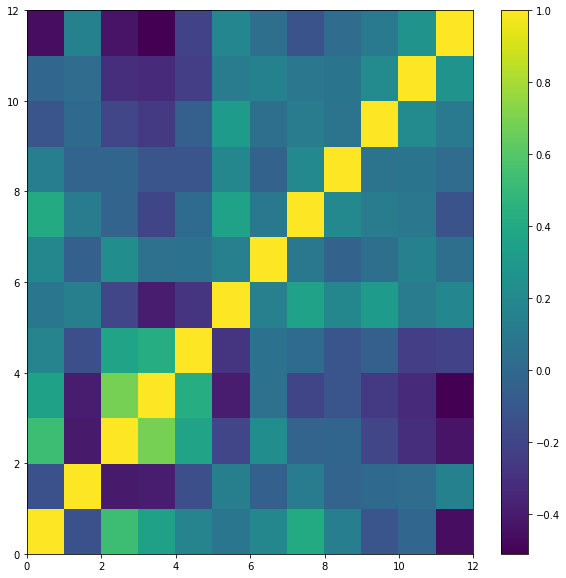

In [201]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corr_flavor.pdf")

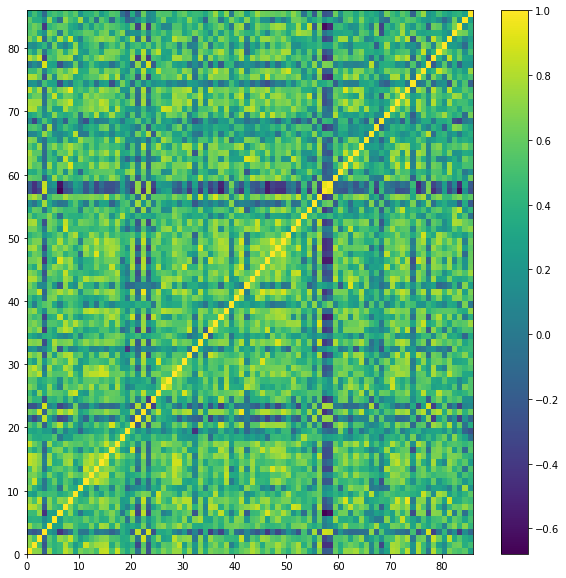

In [202]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize = (10,10))
plt.pcolor(corr_whisky)
plt.colorbar()
plt.axis("tight")
plt.savefig("corr_whisky.pdf")

In [203]:
from sklearn.cluster.bicluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
model.rows_

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False,  True, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, Fals

In [204]:
np.sum(model.rows_, axis=1)

array([ 5, 20, 19,  6, 19, 17])

In [205]:
np.sum(model.rows_, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [206]:
model.row_labels_

array([2, 4, 5, 3, 2, 1, 5, 4, 2, 5, 4, 1, 2, 1, 2, 2, 1, 2, 1, 0, 5, 3,
       5, 3, 5, 5, 4, 4, 5, 4, 5, 2, 1, 1, 1, 2, 4, 5, 1, 0, 1, 5, 4, 4,
       4, 1, 2, 1, 1, 5, 5, 4, 4, 4, 1, 0, 2, 3, 3, 1, 5, 2, 4, 2, 2, 4,
       0, 2, 0, 1, 4, 2, 1, 2, 4, 2, 5, 3, 2, 5, 1, 5, 4, 1, 4, 1],
      dtype=int32)

In [212]:
whisky["Group"] = pd.Series(model.row_labels_, index = whisky.index)
whisky = whisky.sort_values(by=["Group"])


In [214]:
whisky.iloc[0:10]

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
39,40,GlenScotia,2,2,2,2,0,1,0,1,2,2,1,1,PA28 6DS,172090,621010,Campbelltown,0
55,56,Isle of Jura,2,1,2,2,0,1,1,0,2,1,1,1,PA60 7XT,152660,667040,Islands,0
68,69,OldPulteney,2,1,2,2,1,0,1,1,2,2,2,2,KW1 5BA,336730,950130,Highlands,0
19,20,Bruichladdich,1,1,2,2,0,2,2,1,2,2,2,2,PA49 7UN,126680,661400,Islay,0
66,67,Oban,2,2,2,2,0,0,2,0,2,2,2,0,PA34 5NH,185940,730190,Highlands,0
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,1
32,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,1
38,39,GlenOrd,3,2,1,0,0,1,2,1,1,2,2,2,IV6 7UJ,251810,850860,Highlands,1
40,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,1
45,46,Glenfiddich,1,3,1,0,0,0,0,0,0,2,2,2,AB55 4DH,332680,840840,Speyside,1


In [215]:
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations

,39,55,68,19,66,85,32,38,40,45,47,48,54,59,18,33,34,72,13,83,80,11,69,16,5,78,75,64,73,71,56,61,67,46,63,0,31,4,35,8,...,23,3,77,57,62,36,70,7,74,82,1,65,10,42,44,53,52,51,26,27,29,43,84,37,30,81,2,79,41,76,24,22,28,9,25,49,50,20,6,60
39,1.000000,0.705024,0.519615,0.291111,0.553399,-4.029166e-17,2.696799e-01,0.172935,0.367423,0.359211,-0.043234,0.039528,0.219265,7.254763e-02,2.927700e-01,0.156293,-0.033710,0.288231,-3.627381e-02,-5.372222e-17,0.078146,1.192571e-17,0.043853,0.078146,0.326377,3.263767e-01,0.188982,0.521862,0.539360,0.519615,0.129099,0.438230,1.463850e-01,0.120972,0.216930,0.392705,0.438230,0.613941,0.343616,0.539796,...,0.400000,0.552177,0.430331,0.493881,0.282279,0.219265,0.241943,3.872983e-01,0.490881,0.316228,0.030715,-0.037796,3.442652e-01,3.442652e-01,2.609312e-01,0.638145,0.216169,0.362915,0.362738,0.306970,3.508232e-01,0.195366,6.527534e-01,1.192571e-17,0.604743,0.343616,0.434542,0.168550,0.290659,0.168550,1.343055e-17,0.362915,0.350823,0.434813,0.625172,0.046625,0.250000,0.250000,0.032616,0.387298
55,0.705024,1.000000,0.563602,0.536783,0.685994,-1.968183e-01,-2.193817e-01,0.164128,0.000000,0.019481,-0.023447,-0.171499,0.190261,-1.967224e-01,4.763305e-01,0.021190,0.146254,0.052105,3.934447e-02,-1.968183e-01,0.360237,-1.293525e-17,-0.047565,-0.148333,0.101144,-5.057217e-02,0.040996,0.283020,0.219382,0.375735,0.140028,0.292509,-3.525554e-17,-0.065606,0.294118,0.133109,0.292509,0.332956,0.026622,0.360302,...,0.650791,0.768180,0.700140,0.563884,-0.076544,0.190261,0.196818,-1.554623e-17,0.665544,0.171499,-0.033315,0.040996,2.333800e-01,4.667600e-02,-1.768873e-01,0.505813,-0.023447,-0.065606,0.314756,0.237826,4.756515e-02,-0.021190,3.540052e-01,-1.293525e-17,0.327968,0.186352,0.235664,0.255945,0.090075,0.255945,6.560610e-02,0.196818,0.332956,0.557370,0.529761,0.101144,0.542326,0.054233,-0.035377,0.420084
68,0.519615,0.563602,1.000000,0.302532,0.547723,6.984303e-02,-2.335497e-01,0.224649,0.141421,0.311086,0.074883,-0.136931,-0.151911,2.790128e-17,0.000000e+00,-0.067677,0.350325,-0.166410,2.790128e-17,-3.492151e-01,0.338384,-2.480695e-01,0.151911,0.338384,0.000000,-1.793172e-17,0.130931,0.112987,0.389249,0.200000,-0.149071,0.467099,-1.690309e-01,0.209529,0.375735,0.085023,0.116775,0.303822,0.085023,0.431517,...,0.461880,0.540573,0.347833,0.450225,-0.048892,0.000000,0.069843,-1.490712e-01,-0.085023,-0.273861,-0.319197,-0.130931,-4.969040e-02,-4.969040e-02,2.508805e-17,0.085023,-0.224649,-0.069843,0.251312,0.303822,3.373100e-17,0.067677,-1.793172e-17,2.480695e-01,0.523723,0.425115,0.173688,0.350325,0.143839,0.350325,6.984303e-02,0.209529,0.151911,0.410792,0.609091,0.161515,0.346410,0.346410,0.225973,0.447214
19,0.291111,0.536783,0.302532,1.000000,0.368230,-2.465135e-01,-4.317878e-01,0.163616,0.000000,0.073199,0.364989,0.184115,0.408514,-4.223886e-02,4.261432e-01,0.147871,0.314027,0.027969,3.379109e-01,3.169459e-01,0.193369,1.876222e-01,0.051064,0.193369,-0.027146,2.986089e-01,0.418113,-0.018990,0.196267,0.504219,0.225494,0.274774,2.556859e-01,0.316946,0.347330,0.328672,0.274774,0.255321,0.100031,0.265930,...,0.058222,0.244612,0.275604,-0.060537,-0.139697,0.102129,0.246514,7.516460e-02,0.357252,0.092057,0.304008,0.154042,-1.252743e-01,-1.252743e-01,1.899000e-02,0.357252,0.138444,-0.105649,0.042239,0.204257,2.553215e-01,0.125121,-1.357313e-01,4.377851e-01,0.110030,0.442993,0.360039,0.314027,0.265930,0.196267,2.465135e-01,0.316946,0.408514,0.230144,0.284366,0.461486,0.465778,0.465778,0.436770,0.676481
66,0.553399,0.685994,0.547723,0.368230,1.000000,3.825460e-01,-6.509259e-17,0.341793,0.193649,0.283981,0.273434,-0.062500,0.277350,5.735393e-02,2.314550e-01,-0.061780,0.373101,0.151911,2.294157e-01,-6.370671e-17,0.432461,9.428100e-18,0.346688,0.061780,0.147442,-7.372098e-02,0.239046,0.257855,0.213201,0.273861,0.204124,0.266501,2.314550e-01,0.191273,0.171499,0.077615,0.266501,0.485363,0.155230,0.328266,...,0.790569,0.721230,0.816497,0.452097,0.089264,0.485363,0.382546,2.041241e-01,0.388075,0.250000,0.097129,0.059761,2.6439

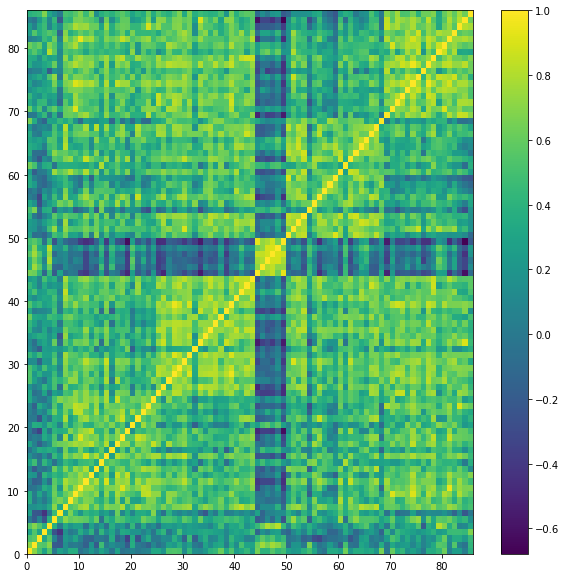

In [216]:
plt.figure(figsize=(10,10))
plt.pcolor(correlations)
plt.colorbar()
plt.savefig("correlations.pdf")